<a href="https://colab.research.google.com/github/Mayankkapoor7/House-Price-prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
Housing=pd.read_csv('/content/USA_Housing.csv')
Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# Finding the unique values in the column
for i in Housing.columns:
  print(i)
  print()
  print(set(Housing[i].tolist()))
  print()

Avg. Area Income

{65543.33854, 65550.80328, 65554.84252, 65561.45584, 65566.35691, 65567.85918, 65573.46111, 65579.37802, 65580.05597, 65594.06739, 65606.35861, 65608.60771, 65614.78487, 65627.05111, 65629.88097, 65632.92598, 65641.80717, 65643.86248, 65659.58698, 65669.98453, 65672.20442, 65673.75136, 65674.59699, 65687.10668, 65692.6182, 65694.05127, 65697.82067, 98468.25364, 65706.75564, 65718.30197, 65729.22233, 65736.34642, 65739.68602, 65741.39764, 65745.73181, 65801.23308, 65803.60065, 65817.20028, 65825.82895, 65827.33514, 65827.67224, 65837.11694, 65841.30879, 65846.40694, 65846.17104, 65851.26289, 65855.86324, 65864.97112, 65866.45257, 65873.93941, 65885.13576, 65893.44773, 65896.42207, 65897.66157, 65901.47709, 65901.03035, 65903.25066, 65904.80993, 65907.94668, 65908.73975, 65913.86161, 65925.8538, 65935.61261, 65935.57561, 65939.88495, 65948.91814, 65950.34702, 65959.78116, 65966.01721, 65967.76931, 65969.70704, 65973.38432, 65984.75064, 65984.29691, 65986.81794, 65987.71

In [4]:
# To find the information about the dataset
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


# Data Preprocessing
###1) Handling missing data - mandatory (because algorithm will not work with missing data
###2) Encoding (Char to Num) - only required when variable is signigicant (understanding and by the help of p value)
###3) Outlier Trestment - Linear Regression problem(it's mandatory)
###4) Feature Scaling - to scale independent variable only (also please note that if you use gradient descent/KNN/SVM etc then you have to use feature scaling techniques

In [6]:
# Part 1: Missing value treatment
Housing.isnull().sum()

,0
Avg. Area Income,10
Avg. Area House Age,0
Avg. Area Number of Rooms,5
Avg. Area Number of Bedrooms,6
Area Population,0
Price,0
Address,0


In [7]:
Housing.isnull().sum()/len(Housing)*100

,0
Avg. Area Income,0.20
Avg. Area House Age,0.00
Avg. Area Number of Rooms,0.10
Avg. Area Number of Bedrooms,0.12
Area Population,0.00
Price,0.00
Address,0.00


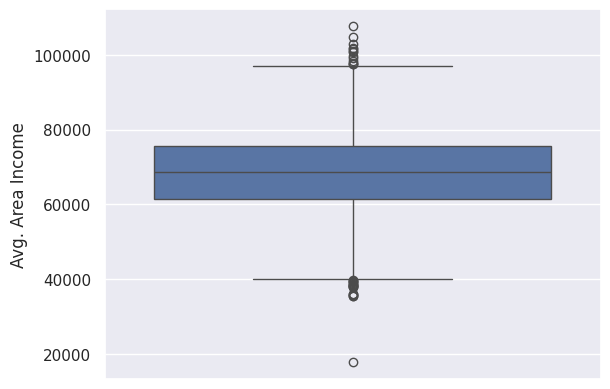

In [8]:
sns.boxplot(y='Avg. Area Income',data=Housing)
plt.show()

In [9]:
Housing['Avg. Area Income']=Housing['Avg. Area Income'].fillna(Housing['Avg. Area Income'].median())

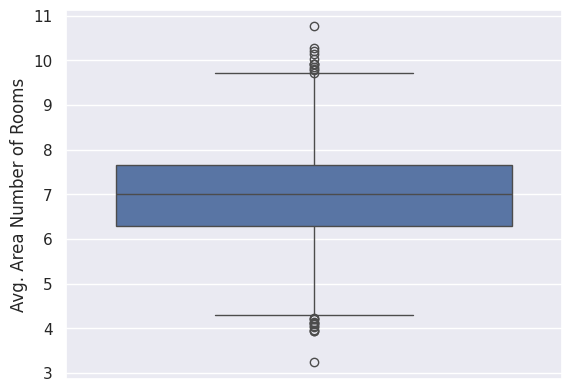

In [10]:
sns.boxplot(y='Avg. Area Number of Rooms',data=Housing)
plt.show()

In [11]:
Housing['Avg. Area Number of Rooms']=Housing['Avg. Area Number of Rooms'].fillna(Housing['Avg. Area Number of Rooms'].median())

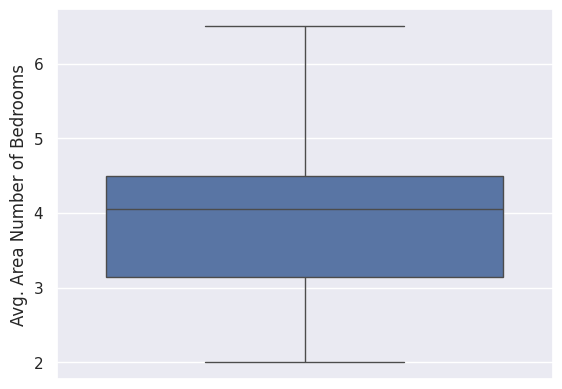

In [12]:
sns.boxplot(y='Avg. Area Number of Bedrooms',data=Housing)
plt.show()

In [13]:
Housing['Avg. Area Number of Bedrooms']=Housing['Avg. Area Number of Bedrooms'].fillna(Housing['Avg. Area Number of Bedrooms'].mean())

In [14]:
Housing.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [15]:
# Part 2: Encoding : (Address column is not required as area information is already given) - hence drop it
Housing=Housing.iloc[:,0:-1]
Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


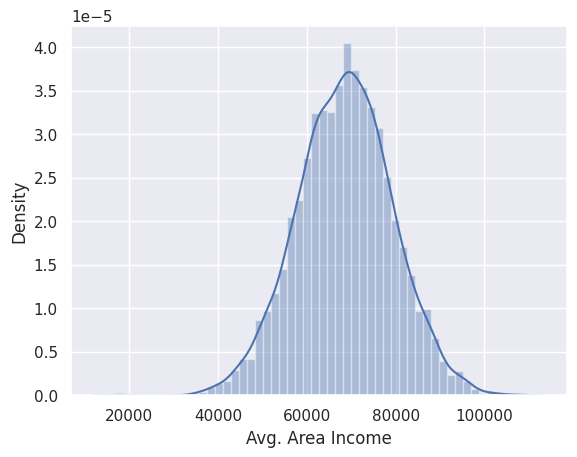

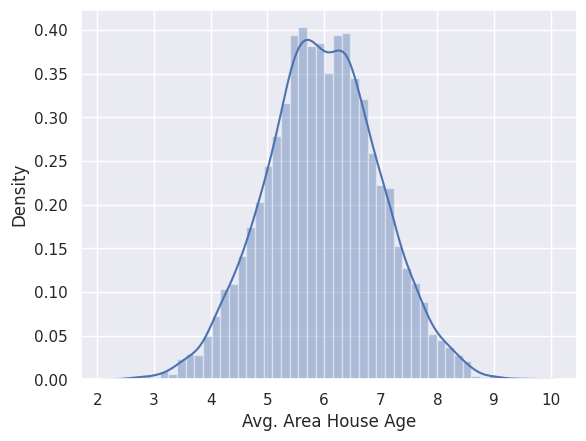

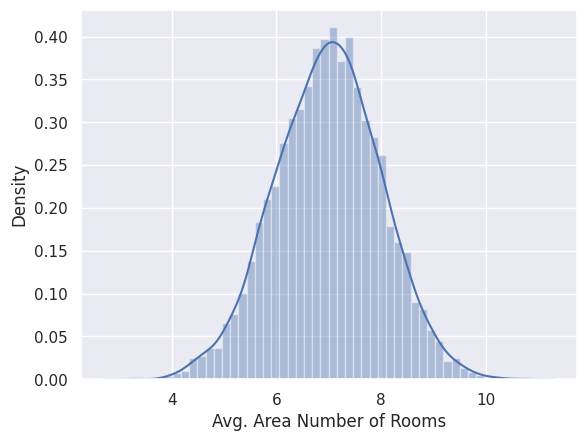

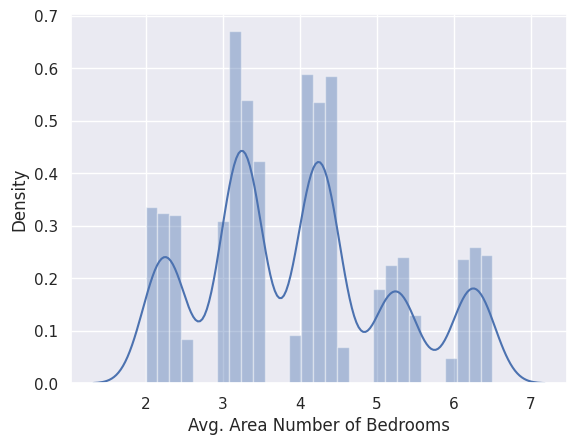

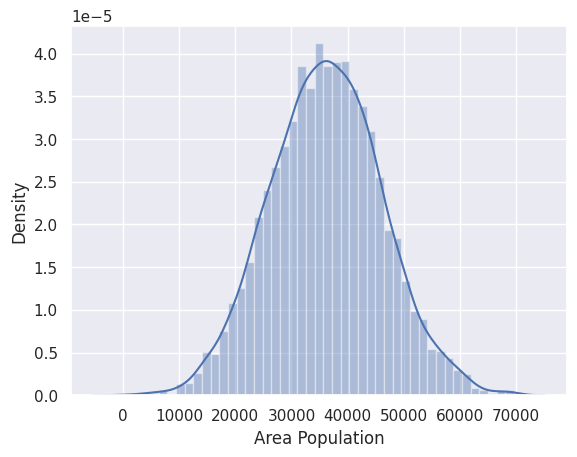

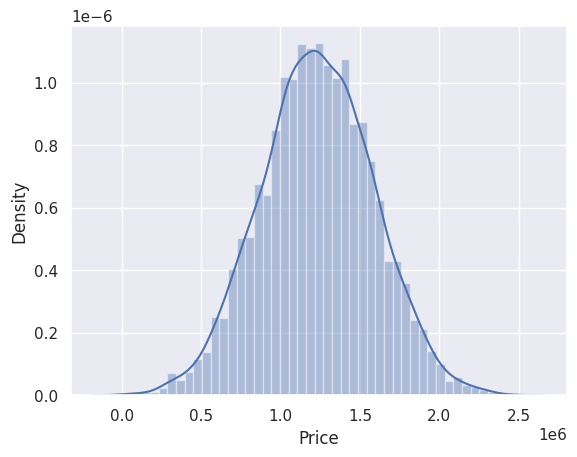

In [16]:
#  Part 3 - Handling Outlier
def distplots(col):
  sns.distplot(Housing[col])
  plt.show()

for i in list(Housing.columns)[0:]:
  distplots(i)

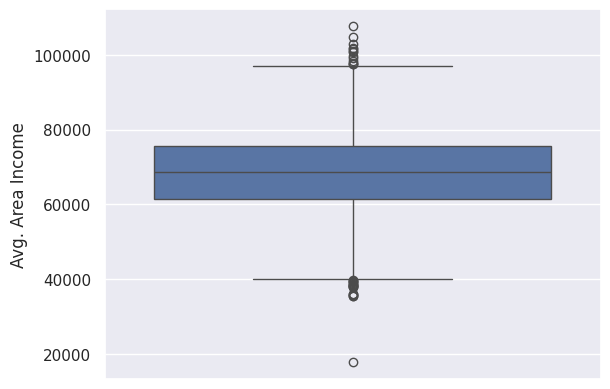

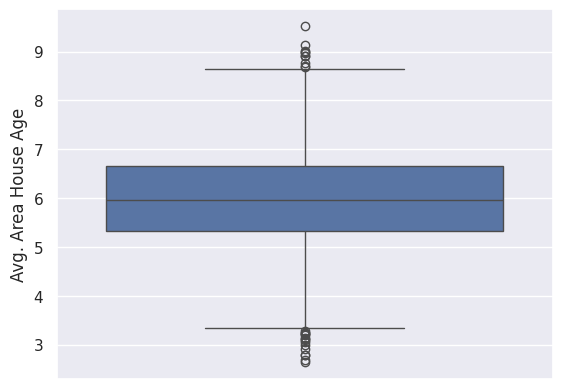

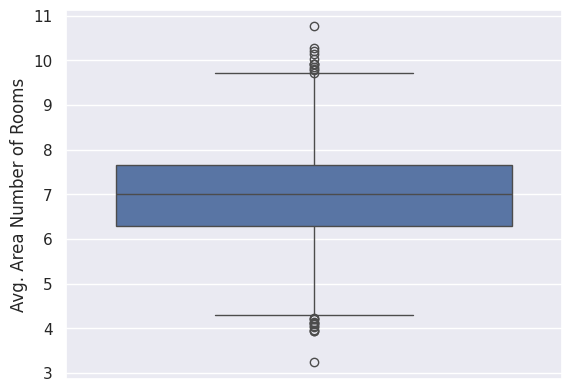

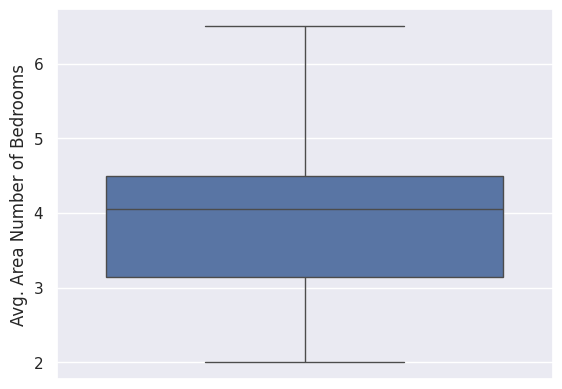

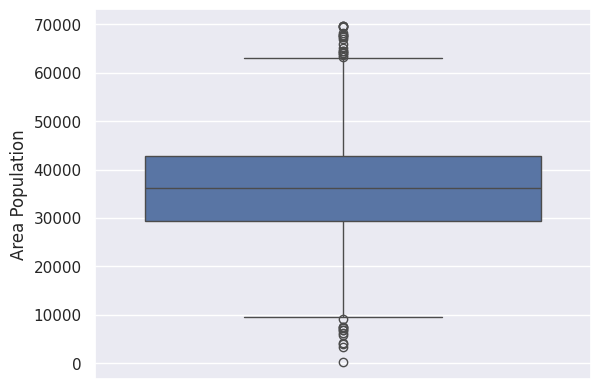

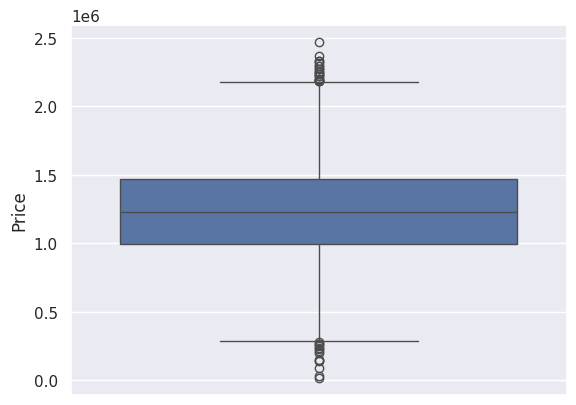

In [17]:
def boxplots(col):
  sns.boxplot(Housing[col])
  plt.show()

for i in list(Housing.select_dtypes(exclude=['object']).columns)[0:]:
  boxplots(i)

In [18]:
Housing.dtypes

,0
Avg. Area Income,float64
Avg. Area House Age,float64
Avg. Area Number of Rooms,float64
Avg. Area Number of Bedrooms,float64
Area Population,float64
Price,float64


In [19]:
# We have to handle outlier for the following variables
# Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms	 and Area Population

In [20]:
q1=Housing.quantile(0.25)
q3=Housing.quantile(0.75)
iqr=q3-q1

Pos_outlier=q3+1.5*iqr
neg_outlier=q1-1.5*iqr

print("Q1 :",q1)
print()
print("Q3 :",q3)
print()
print("IQR :",iqr)
print()
print("Positive Outlier :",Pos_outlier)
print()
print("Negative Outlier:",neg_outlier)
print()


Q1 : Avg. Area Income                 61485.150192
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299692
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928700
Price                           997577.135075
Name: 0.25, dtype: float64

Q3 : Avg. Area Income                7.576652e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665281e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64

IQR : Avg. Area Income                 14281.368910
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.365589
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362070
Price                           473633.069425
dtype: float64

Positive Outlier : Avg. Area Income                9.718857e+04
Avg. Area House Age       

In [21]:
income_q1=Housing['Avg. Area Income'].quantile(0.25)
income_q3=Housing['Avg. Area Income'].quantile(0.75)
income_iqr=income_q3-income_q1
lower_limit=income_q1-1.5*income_iqr
upper_limit=income_q3+1.5*income_iqr

In [22]:
Housing['Avg. Area Income']=np.where(Housing['Avg. Area Income'] > upper_limit, upper_limit,
                                     np.where(Housing['Avg. Area Income']<lower_limit,lower_limit,
                                              Housing['Avg. Area Income']))

In [23]:
income_q1=Housing['Avg. Area House Age'].quantile(0.25)
income_q3=Housing['Avg. Area House Age'].quantile(0.75)
income_iqr=income_q3-income_q1
lower_limit=income_q1-1.5*income_iqr
upper_limit=income_q3+1.5*income_iqr

In [24]:
Housing['Avg. Area House Age']=np.where(Housing['Avg. Area House Age'] > upper_limit, upper_limit,
                                     np.where(Housing['Avg. Area House Age']<lower_limit,lower_limit,
                                              Housing['Avg. Area House Age']))

In [25]:
income_q1=Housing['Avg. Area Number of Rooms'].quantile(0.25)
income_q3=Housing['Avg. Area Number of Rooms'].quantile(0.75)
income_iqr=income_q3-income_q1
lower_limit=income_q1-1.5*income_iqr
upper_limit=income_q3+1.5*income_iqr

In [26]:
Housing['Avg. Area Number of Rooms']=np.where(Housing['Avg. Area Number of Rooms'] > upper_limit, upper_limit,
                                     np.where(Housing['Avg. Area Number of Rooms']<lower_limit,lower_limit,
                                              Housing['Avg. Area Number of Rooms']))

In [27]:
income_q1=Housing['Area Population'].quantile(0.25)
income_q3=Housing['Area Population'].quantile(0.75)
income_iqr=income_q3-income_q1
lower_limit=income_q1-1.5*income_iqr
upper_limit=income_q3+1.5*income_iqr

In [28]:
Housing['Area Population']=np.where(Housing['Area Population'] > upper_limit, upper_limit,
                                     np.where(Housing['Area Population']<lower_limit,lower_limit,
                                              Housing['Area Population']))

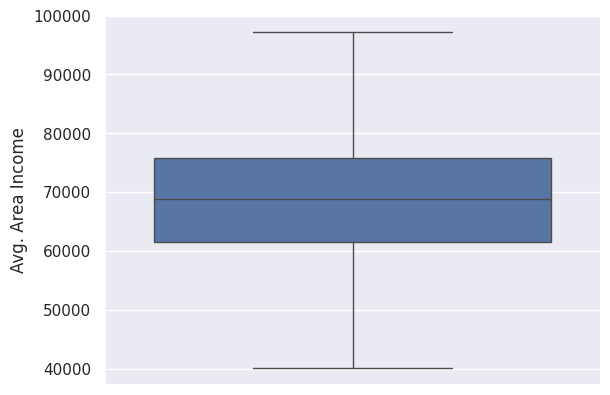

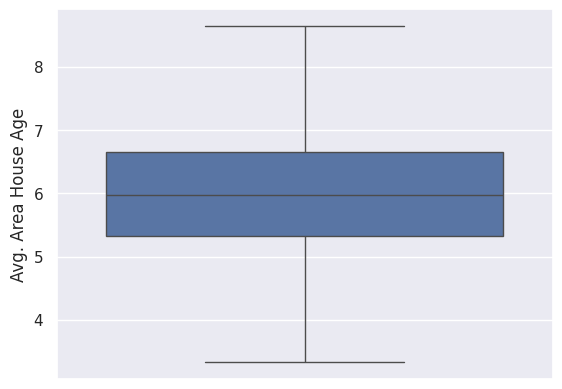

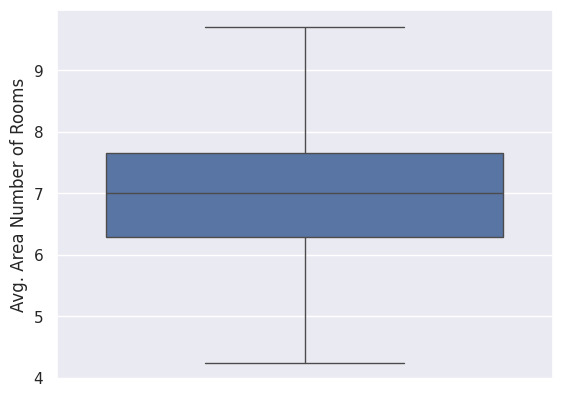

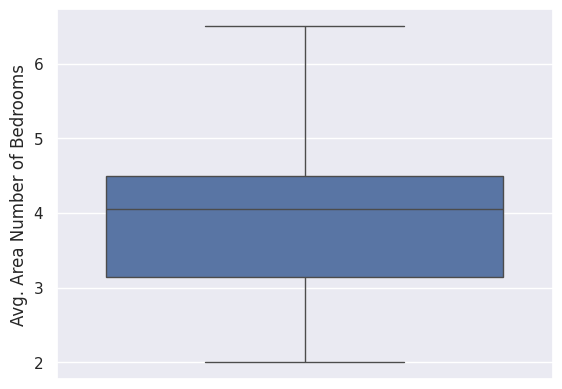

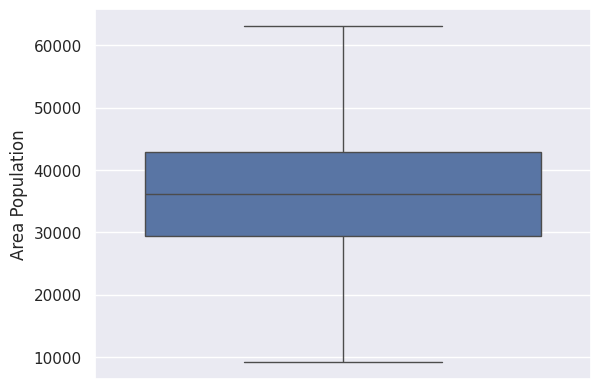

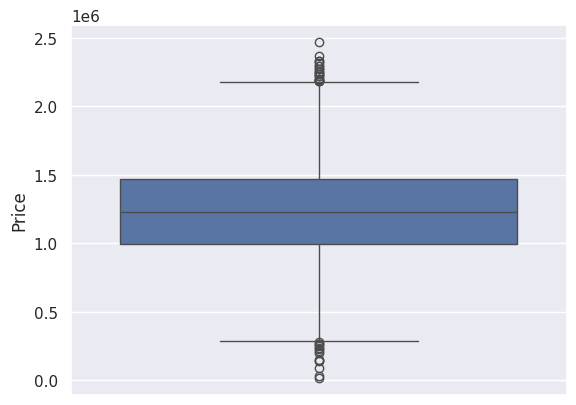

In [29]:
def boxplots(col):
  sns.boxplot(Housing[col])
  plt.show()

for i in list(Housing.select_dtypes(exclude=['object']).columns)[0:]:
  boxplots(i)

In [30]:
# Part 4 - Feature Scaling - first we have to split the data into independent and dependent variable
x=Housing.iloc[:,0:-1]
y=Housing.iloc[:,-1]

In [31]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [32]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [33]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087648,-1.325622
1,1.008309,0.025747,-0.256381,-0.722966,0.407049
2,-0.690457,-0.113082,1.523179,0.930687,0.073326
3,-0.495800,1.226822,-1.398967,-0.585161,-0.187484
4,-0.813869,-0.949376,0.850726,0.201134,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423039,-1.350917
4996,0.936679,1.035210,-0.410236,0.030905,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501155,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181977,0.655755


In [34]:
# It's a multiple linear regression, hence we have to check 'Multicollinearity'
variable=sc_x
variable.shape

(5000, 5)

In [35]:
pip install statsmodels

# To check Multicollinearity -VIF(Variance Inflation Factor)

In [36]:
# VIF value is more then 5 means there is a multicollinearity there in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

variable=sc_x
vif = pd.DataFrame()

# Calculate VIF for each feature
vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for i in range(x.shape[1])]

# Add the feature names
vif['features'] = x.columns

# Display the VIF DataFrame
vif

# In the context of Variance Inflation Factor (VIF), it's generally recommended to use scaled data

,variance_inflation_factor,features
0,1.001066,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274838,Avg. Area Number of Rooms
3,1.275700,Avg. Area Number of Bedrooms
4,1.001142,Area Population


# Finding correlation

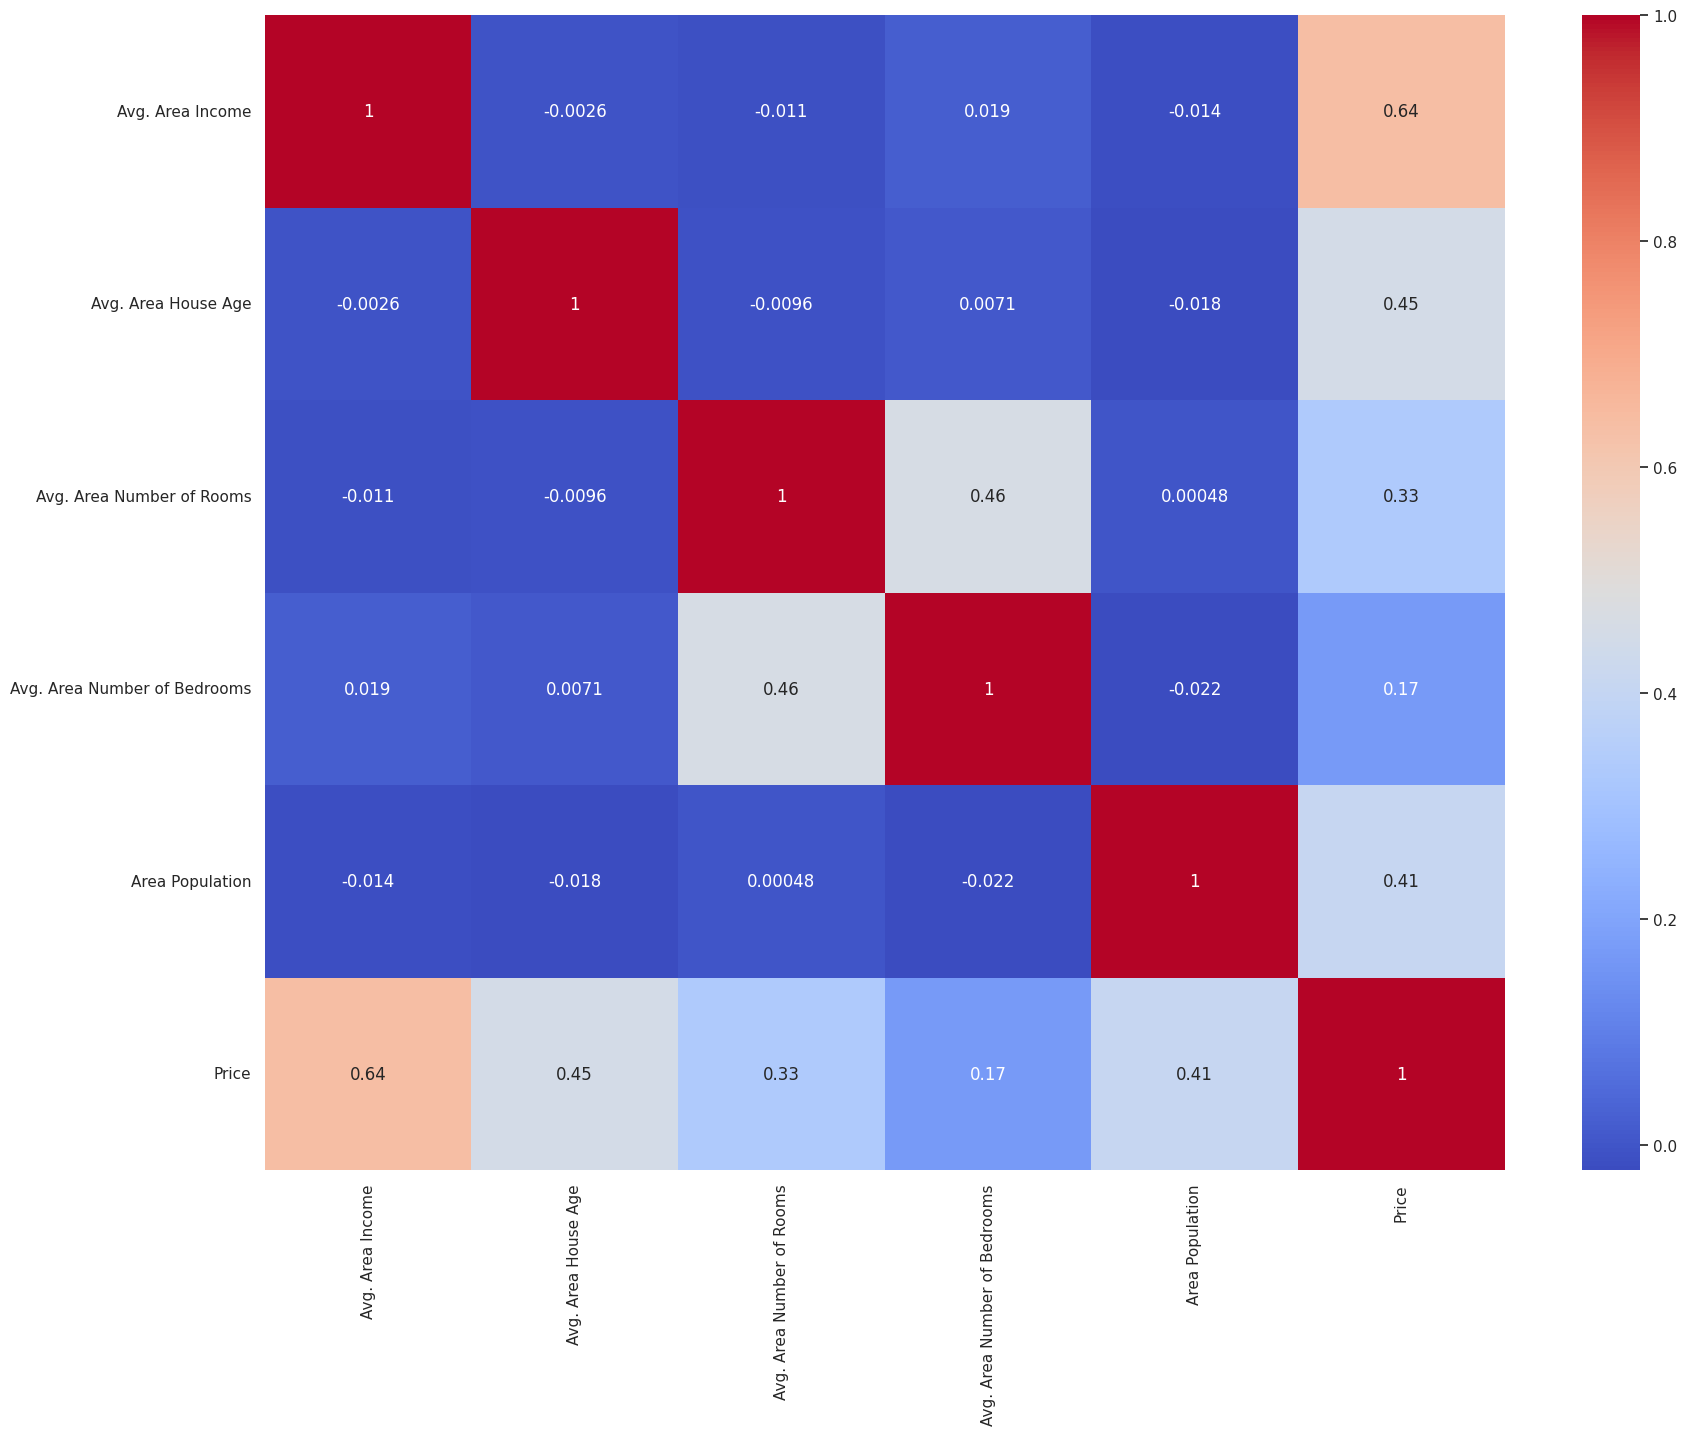

In [37]:
plt.figure(figsize=(20,15))
corr=Housing.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [38]:
# split the data into training and testing where training is for model building and testing is for predicting and evaluating

In [39]:
# There is no fixed threshold value, basis experience we use 70-30, by default system consider 75-25
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [40]:
print(x_train.shape)
print(x_test.shape)

(4000, 5)
(1000, 5)


In [41]:
print(y_train.shape)
print(y_test.shape)

(4000,)
(1000,)


# Building Model -Linear Regression
# Approach no 1- basic method

In [42]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [43]:
print(lm.coef_)

[2.16945001e+01 1.66248132e+05 1.20688103e+05 2.25185990e+03
 1.53824740e+01]


In [44]:
print(lm.intercept_)

-2657736.2841027654


In [45]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [46]:
# Price= 2.16945001e+01*Avg. Area Income + 1.66248132e+05*Avg. Area House Age + 1.20688103e+05*Avg. Area Number of Rooms + 2.25185990e+03*'Avg. Area Number of Bedrooms + 1.53824740e+01*Area Population -2657736.2841027654

In [47]:
Price= 2.16945001e+01*50000 + 1.66248132e+05*5 + 1.20688103e+05*3+ 2.25185990e+03*3
+ 1.53824740e+01*500000 -2657736.2841027654

5033500.715897234

In [48]:
 Price

2284785.5537

In [49]:
# Predict test dataset with linear model
y_pred=lm.predict(x_test)
y_pred

array([1257801.5087042 ,  820736.65554305, 1742384.6288843 ,
        971556.54178687,  993269.83084205,  642353.14156245,
       1073622.98169101,  854867.6295665 , 1445951.76376711,
       1203254.09152324, 1456284.15360364, 1297824.086013  ,
       1738731.62176845, 1337685.96043885, 1387989.72586485,
       1223052.14358938,  611797.99825385,  963068.44918884,
       1221022.03683746, 1197821.7414103 ,  502405.75545989,
       1771308.75361328, 1857630.2042311 , 1199400.01133427,
       1064410.11473407, 1814569.93684779, 1771057.5951353 ,
       1440697.35404042, 1387238.04561548, 1542448.28841062,
        725651.86182772, 1757215.40754188, 1464827.96503723,
       1025030.56878365, 1284663.91244676,  915848.05103163,
       1207396.90589691,  998919.15158223, 1329970.92620203,
        781289.77236732, 1394262.01696157,  615607.12293049,
        821332.35899643, 1898345.19142752, 1674168.73645672,
        964784.55949877, 1128997.39407795,  790352.8412476 ,
       1160396.50078473,

In [50]:
y_test

,Price
1718,1.251689e+06
2511,8.730483e+05
345,1.696978e+06
2521,1.063964e+06
54,9.487883e+05
...,...
3900,1.466412e+06
3753,1.222412e+06
3582,1.404622e+06
2392,9.100996e+05


# Evaluation

In [51]:
from sklearn.metrics import r2_score
print('Accuracy :', r2_score(y_test,y_pred))

Accuracy : 0.9198161279364574


# Approach no 2- OLS method

In [52]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [53]:
reg_model=smf.OLS(endog=y_train, exog=x_train).fit()

In [54]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.151e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                        0.00
Time:                        08:15:48   Log-Likelihood:                         -55260.
No. Observations:                4000   AIC:                                  1.105e+05
Df Residuals:                    3995   BIC:                                  1.106e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2577      0.303     33.838      0.000       9.663      10.852
Avg. Area House Age           4.943e+04   3327.142     14.856      0.000    4.29e+04     5.6e+04
Avg. Area Number of Rooms    -1.107e+04   3678.411     -3.010      0.003   -1.83e+04   -3859.005
Avg. Area Number of Bedrooms  5424.5478   3506.864      1.547      0.122   -1450.862    1.23e+04
Area Population                  8.4335      0.368     22.906      0.000       7.712       9.155
==============================================================================
Omnibus:                        0.257   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.280
Skew:                          -0.018   Prob(JB):                        0.870
Kurtosis:                       2.981   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# Using backward elimination
# Avg. Area Number of Bedrooms variable is non-significant basis p-value
x=x.drop(['Avg. Area Number of Bedrooms'],axis=1)

In [56]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


In [127]:
# There is no fixed threshold value, basis experience we use 70-30, by default system consider 75-25
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [58]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [59]:
reg_model=smf.OLS(endog=y_train, exog=x_train).fit()

In [60]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.688e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                        0.00
Time:                        08:15:48   Log-Likelihood:                         -55261.
No. Observations:                4000   AIC:                                  1.105e+05
Df Residuals:                    3996   BIC:                                  1.106e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Avg. Area Income             10.2624      0.303     33.849      0.000       9.668      10.857
Avg. Area House Age        4.952e+04   3327.221     14.883      0.000     4.3e+04     5.6e+04
Avg. Area Number of Rooms -8016.1797   3103.959     -2.583      0.010   -1.41e+04   -1930.688
Area Population               8.4142      0.368     22.863      0.000       7.693       9.136
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.402
Skew:                          -0.021   Prob(JB):                        0.818
Kurtosis:                       2.973   Cond. No.                     7.84e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

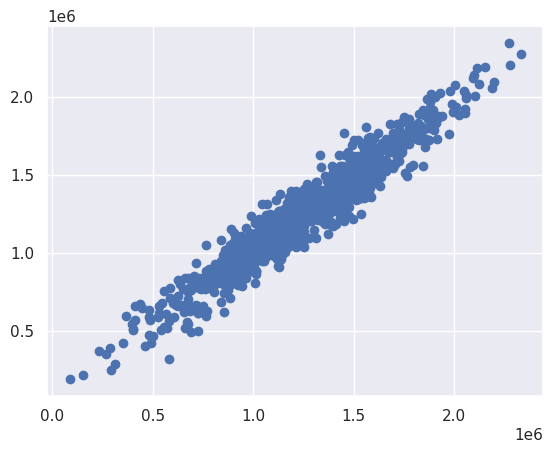

In [61]:
# Accuracy : Adj. R-squared (uncentered) : 0.964
# p-value - all variables are statistically significant (p<=0.05)
# Assumption checks
# 1)Multicolinearity - Not found
# 2) Endogenity - selected right dependent variable- satisfied
# 3)Hetroscedasticity - already handled outlier hence data is homoscedasticity
#4) Autocorrelation - Durbin Watson test 1.99(p-value<=0.05)- satisfied (no autocorrelation found)
#5) Check linearity
#6) Normality of residual
plt.scatter(y_test,y_pred)
plt.show()

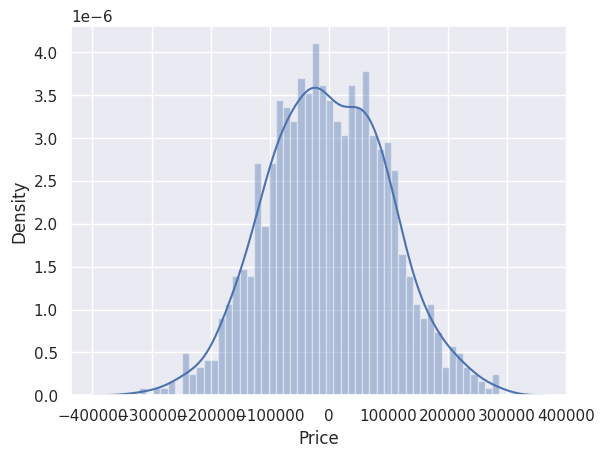

In [62]:
sns.distplot((y_test-y_pred),bins=50)
plt.show()

In [63]:
dataset=pd.read_csv('/content/USA_Housing.csv')

# To check if a variable is statistically significant

In [64]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [65]:
dataset['Address'].nunique()

5000

In [129]:
y_prem_lm_train=lm.predict(x_train)
y_pred_lm_test=lm.predict(x_test)

In [66]:
# Anova Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [67]:
dataset['Address']=dataset['Address'].astype('category')
dataset['Address']=dataset['Address'].cat.codes

In [68]:
model=ols('Price~Address', data=dataset).fit()
anova_result_p_value=sm.stats.anova_lm(model, ty=2)
print(anova_result_p_value)# Variable is not statistically significant

              df        sum_sq       mean_sq         F    PR(>F)
Address      1.0  4.729103e+10  4.729103e+10  0.379215  0.538051
Residual  4998.0  6.232883e+14  1.247075e+11       NaN       NaN


# Regularization

In [69]:
# Regularization method
### 1) Lasso- L1 regularization
### 2) Ridge L2 regularization --------> very significant
### 3) ElasticNet : (L1 + L2) refularization - combination of Lasso and ridge

In [70]:
# Lasso method - exact zero or closure to zero(slope/coefficient)
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print('Laso Regularization ', lasso.coef_)

Laso Regularization  [2.16985072e+01 1.66305824e+05 1.21979077e+05 1.53757131e+01]


In [72]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
print('lm model ', lm.coef_)

lm model  [2.16985074e+01 1.66305930e+05 1.21979180e+05 1.53757132e+01]


In [73]:
y_pred_lasso_train=lasso.predict(x_train)
y_pred_lasso_test=lasso.predict(x_test)

In [76]:
print('Lasso_Train_Acc :', r2_score(y_train, y_pred_lasso_train))
print()
print('Lasso_Test_Acc :', r2_score(y_test, y_pred_lasso_test))

Lasso_Train_Acc : 0.9146841394127485

Lasso_Test_Acc : 0.9198951164785488


# Ridge Regularization (L2)

In [78]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
print('Ridge model :',ridge.coef_)

Ridge model : [2.16985007e+01 1.66301548e+05 1.21976021e+05 1.53757081e+01]


In [79]:
y_pred_ridge_train=ridge.predict(x_train)
y_pred_ridge_test=ridge.predict(x_test)

In [83]:
print('Ridge_train_acc :', r2_score(y_train, y_pred_lasso_train))
print()
print('Ridge_Test_acc: ', r2_score(y_test, y_pred_lasso_test))

Ridge_train_acc : 0.9146841394127485

Ridge_Test_acc:  0.9198951164785488


# Elasticet regularization (L1+L2)

In [85]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.3, l1_ratio=0.3)
elasticnet.fit(x_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.3)

In [86]:
print('Elastic Model :', elasticnet.coef_)

Elastic Model : [2.16522766e+01 1.36165406e+05 1.00187976e+05 1.53407024e+01]


In [87]:
y_pred_elastic_train=elasticnet.predict(x_train)
y_pred_elastic_test=elasticnet.predict(x_test)

In [88]:
print('Elastic_train_acc :', r2_score(y_train, y_pred_elastic_train))
print()
print('Elastic_Test_acc: ', r2_score(y_test, y_pred_elastic_test))

Elastic_train_acc : 0.9040139560089321

Elastic_Test_acc:  0.9081024944763643


# Gradient Descent

In [119]:
# There is no fixed threshold value, basis experience we use 70-30, by default system consider 75-25
from sklearn.model_selection import train_test_split
x_train1,x_test1, y_train1, y_test1=train_test_split(sc_x,y,test_size=0.2,random_state=101)

In [120]:
from sklearn.linear_model import SGDRegressor
gdmodel= SGDRegressor()
gdmodel.fit(x_train1, y_train1)

SGDRegressor()

In [121]:
y_pred_sgd_train=gdmodel.predict(x_train1)
y_pred_sgd_test=gdmodel.predict(x_test1)

In [122]:
print(y_pred_sgd_train)
print(y_pred_sgd_test)

[1258455.9171706  1512480.8328104  1088510.76681823 ...  973666.64397515
  925443.44884638 2132712.49316468]
[1256951.47846142  819921.59022801 1741306.44347578  972649.89757193
  993622.41055758  645726.58859952 1071649.51009403  856701.49132808
 1446415.093141   1203268.80759843 1458094.20109278 1295908.35310028
 1742773.50663136 1335928.83080716 1386514.1854382  1224178.77829327
  613901.25797277  964387.74530467 1223240.06180934 1197933.89955936
  502188.38048682 1772127.73902766 1858262.01663349 1199045.42658917
 1066734.96171059 1814129.77279695 1772128.62294541 1441234.48848761
 1386585.1998602  1539777.92996706  731598.0748989  1755564.31310624
 1469561.00494829 1024199.46311743 1282129.90475879  920244.71840265
 1210655.07794917 1002663.44396273 1333377.69438216  786338.69590635
 1396272.65814603  615241.39972852  820022.40896534 1896279.50783001
 1673123.94545516  962697.7181356  1128654.95093517  788140.80592638
 1158627.56423674 1473697.62885837 1462362.90352903 1168802.824

In [123]:
print('GD model training accuracy :', r2_score(y_train,y_pred_sgd_train))
print()
print('Gd model test accuracy :', r2_score(y_test, y_pred_sgd_test))

GD model training accuracy : 0.9146872085518588

Gd model test accuracy : 0.9197587200036901


# How you will ensure  that your model is absolute fine
# Cross Validation Score - K-Fold method

In [124]:
from sklearn.model_selection import cross_val_score
training_accuracy=cross_val_score(lm, x_train, y_train, cv=10)
print('Training accuracy for all 10 cv ', training_accuracy)
print()
print('Training accuracy with mean value :', training_accuracy.mean())
print()
print('Training accuracy with max value :', training_accuracy.max())

Training accuracy for all 10 cv  [0.89654338 0.91427641 0.91829657 0.92102174 0.91447354 0.91599438
 0.907323   0.91401403 0.91222615 0.92715992]

Training accuracy with mean value : 0.9141329126824935

Training accuracy with max value : 0.9271599223836702


# Performance matrix

In [125]:
# Mean ABSOLUTE Error
from sklearn import metrics

In [130]:
print('MAE :', metrics.mean_absolute_error(y_test,y_pred_lm_test))

MAE : 82105.93993245566


In [131]:
# Mean Absolute Percent Error

In [132]:
print('MAPE :', metrics.mean_absolute_error(y_test,y_pred_lm_test)/y_test*100)

MAPE : 1718    6.559614
2511    9.404513
345     4.838363
2521    7.716983
54      8.653768
          ...   
3900    5.599105
3753    6.716716
3582    5.845411
2392    9.021643
3343    6.910129
Name: Price, Length: 1000, dtype: float64


In [ ]:
# Mean Squared Error

In [133]:
print('MSE :', metrics.mean_squared_error(y_test,y_pred_lm_test))

MSE : 10263783173.698616


In [134]:
# Root Mean Squared Error

In [136]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred_lm_test)))

RMSE : 101310.3310314334
